## Model Evaluation
#### Based on best checkpoint and history (.csv) files, we will evaluate the model on the test set.

In [1]:
# Imports
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Local Imports
from plotting import plot_history_csv, plot_grid_from_generator, plot_confusion_matrix
print('TensorFlow version: ', tf.__version__)
print('Python version: ', os.sys.version)

TensorFlow version:  2.16.1
Python version:  3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:42:31) [MSC v.1937 64 bit (AMD64)]


#### Setting paths

In [2]:
MODEL_NAME = 'cnn_medium_100_epochs'

local_dir = './'
dataset_dir = os.path.join(local_dir, 'dataset_grayscale')
test_dir = os.path.join(dataset_dir, 'test')
models_dir = os.path.join(local_dir, 'models_grayscale')

if not os.path.exists(models_dir):
    raise Exception('Models directory does not exist. Please run the training script first.')
if not os.path.exists(dataset_dir):
    raise Exception('Dataset directory does not exist. Please run the training script first.')

model_path = os.path.join(models_dir, f'{MODEL_NAME}_ckp.keras')
history_path = os.path.join(models_dir, f'{MODEL_NAME}_ckp_history.csv')

if not os.path.exists(model_path):
    raise Exception('Model file does not exist. Please run the training script first.')
if not os.path.exists(history_path):
    raise Exception('History file does not exist. Please run the training script first.')

#### Setting up test data generator

Found 861 images belonging to 3 classes.


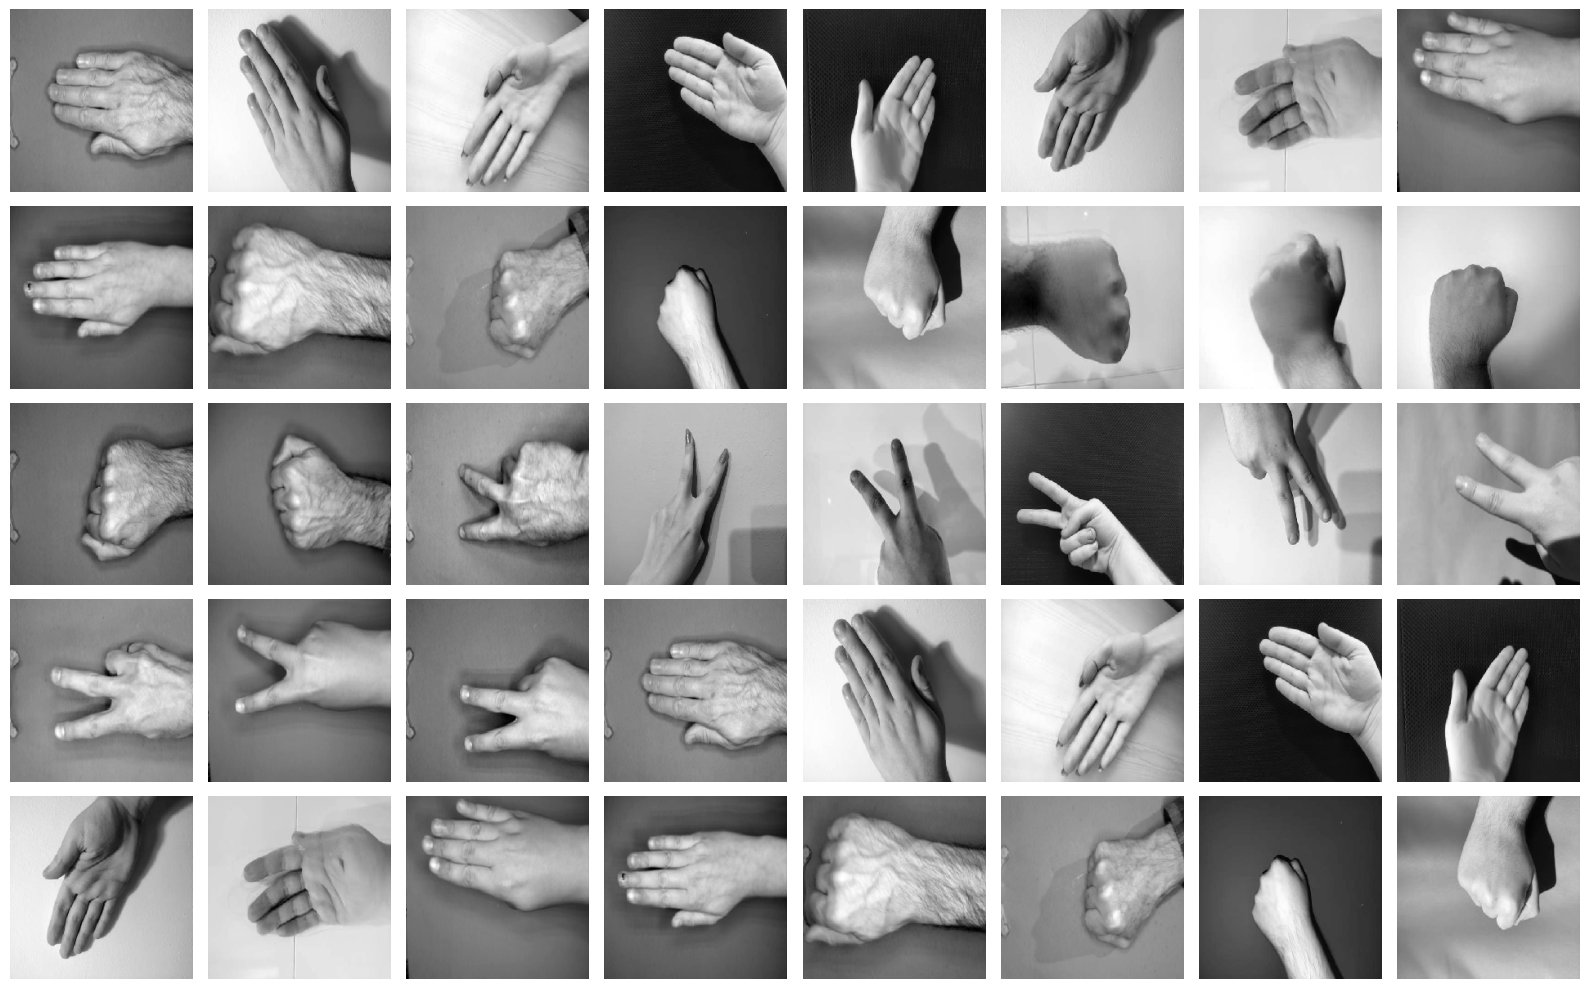

In [3]:
# Image target size
img_rows, img_cols = 224, 224

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False)

plot_grid_from_generator(test_generator, 5, 8, cmap='gray')

### Evaluation

In [4]:
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,749,387 (56.26 MB)

 Trainable params: 4,916,099 (18.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 9,832,200 (37.51 MB)

In [5]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

c:\Users\adria\anaconda3\envs\ML\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 - 3s - 122ms/step - acc: 0.9849 - loss: 0.0796


<Figure size 640x480 with 0 Axes>

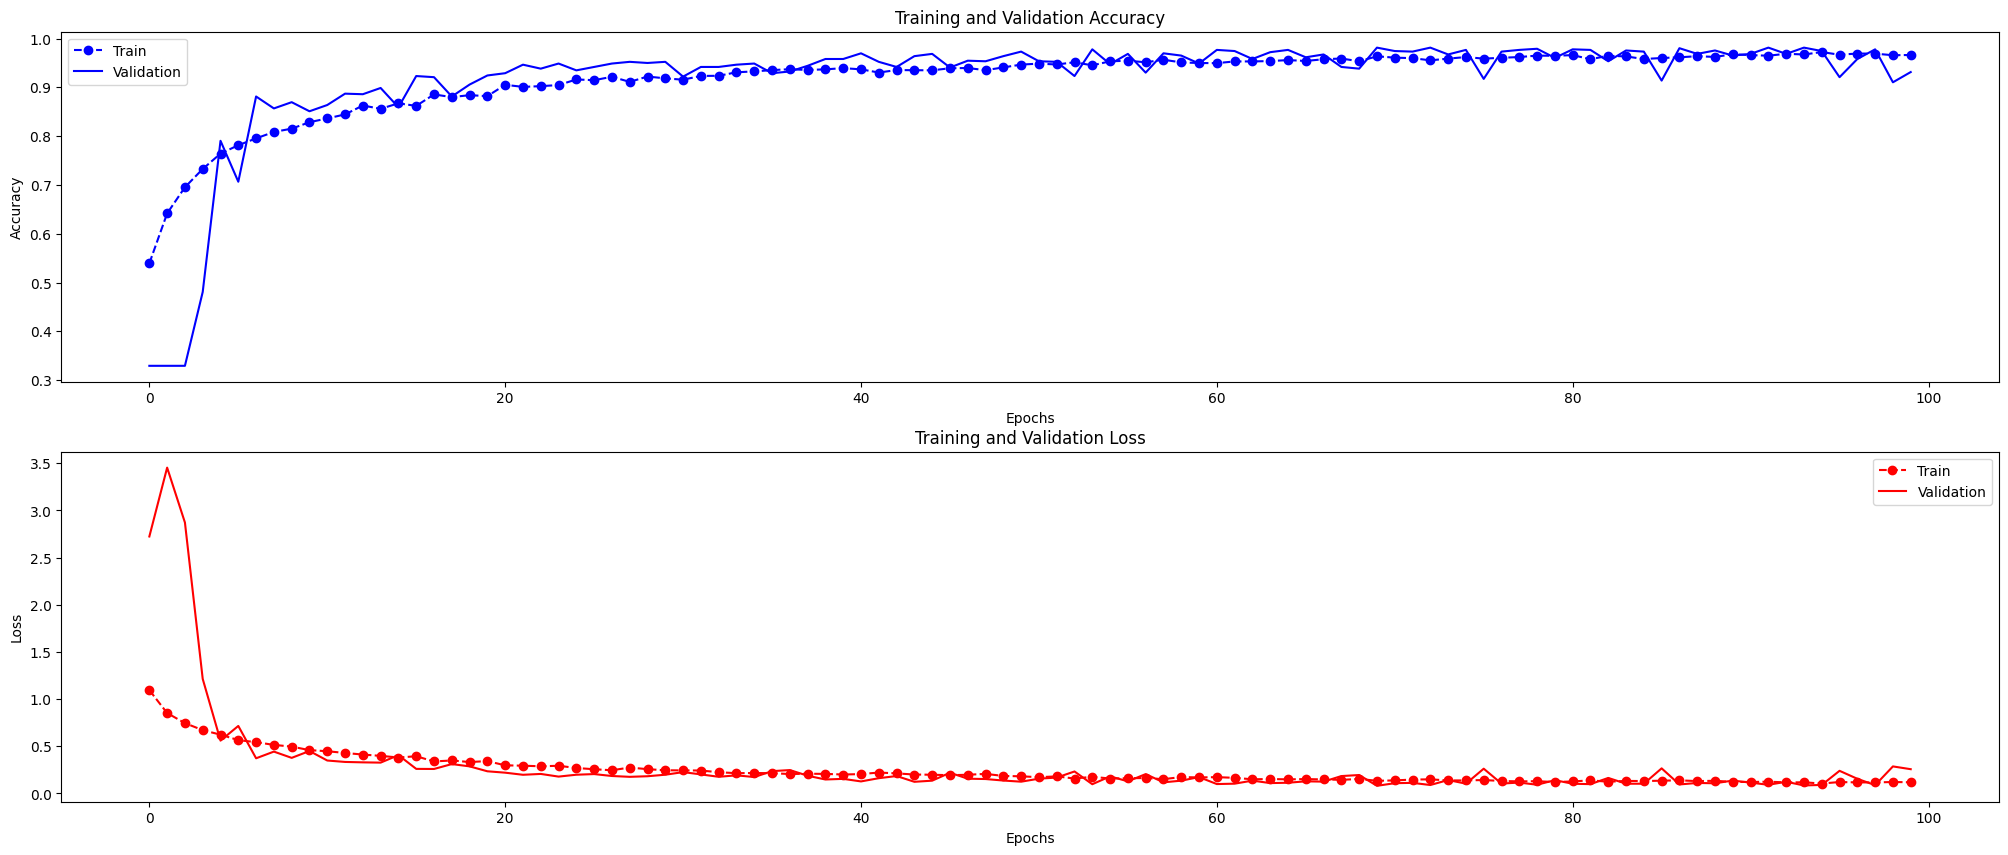

Test accuracy: 0.9849012494087219
Test loss: 0.07957741618156433


In [6]:
plot_history_csv(history_path)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

##### Confusion Matrix

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step


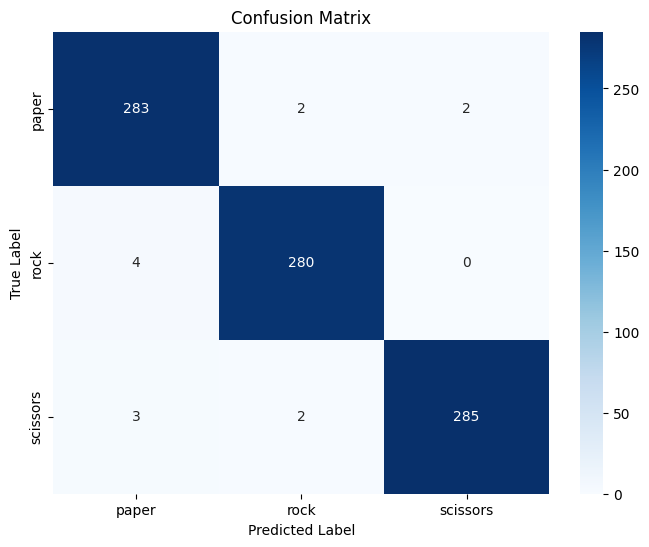

In [7]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

plot_confusion_matrix(y_true, y_pred, class_labels)

In [8]:
print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

       paper       0.98      0.99      0.98       287
        rock       0.99      0.99      0.99       284
    scissors       0.99      0.98      0.99       290

    accuracy                           0.98       861
   macro avg       0.98      0.98      0.98       861
weighted avg       0.98      0.98      0.98       861

